Bilyoner Sportsbook Betslip History Analysis - CS210 Term Project
---

---
Importing data, pure html from Bilyoner is used here. Parsing data with Beautiful soup and converting to Dataframe with pandas

In [136]:
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime


file_path = 'BilyonerBetSlipsHTML.html'

with open(file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()

soup = BeautifulSoup(html_content, 'html.parser')

bets = []

for selection in soup.find_all("div", class_="OM-BettingHistoryItemV1__SelectionBetName"):
    bet_name = selection.get_text(strip=True)

    outcome_element = selection.find_previous("span", class_="OM-BettingHistoryItemV1__SelectionStatusText")
    outcome = outcome_element.get_text(strip=True) if outcome_element else None

    home_team_element = selection.find_next("div", class_="OM-ParticipantsTable__Item--Home")
    away_team_element = selection.find_next("div", class_="OM-ParticipantsTable__Item--Away")
    home_team = home_team_element.get_text(strip=True) if home_team_element else None
    away_team = away_team_element.get_text(strip=True) if away_team_element else None

    date_element = selection.find_next("span", class_="OM-BettingHistoryItemV1__EventDateValueDay")
    time_element = selection.find_next("span", class_="OM-BettingHistoryItemV1__EventDateValueHour")
    if date_element and time_element:
        date_str = date_element.get_text(strip=True)
        time_str = time_element.get_text(strip=True)
        event_datetime = datetime.strptime(date_str + ' ' + time_str, '%d.%m.%Y %H:%M')
    else:
        event_datetime = None

    odds_element = selection.find_next("div", class_="OM-BettingHistoryItemV1__GroupPrice--SelectionPrice")
    odds = odds_element.get_text(strip=True) if odds_element else None

    bets.append({
        "Home Team": home_team,
        "Away Team": away_team,
        "Event Datetime": event_datetime,
        "Bet Selection": bet_name,
        "Bet Odds": odds,
        "Bet Outcome": outcome
    })

df = pd.DataFrame(bets)

---
Data:

In [138]:
df.head(20)

,Home Team,Away Team,Event Datetime,Bet Selection,Bet Odds,Bet Outcome
0,Buyukcekmece Basketbol,Anadolu Efes Istanbul,2024-01-14 20:30:00,Anadolu Efes Istanbul,1.70,Kaybedildi
1,Manchester United,Tottenham Hotspur,2024-01-14 19:30:00,ÜST 4.5,1.22,Kaybedildi
2,AC Fiorentina,Udinese,2024-01-14 20:00:00,ÜST 1.5,2.95,Kazandı
3,Borussia Monchengladbach,VfB Stuttgart,2024-01-14 19:30:00,VfB Stuttgart (+1),1.20,Kaybedildi
4,SL Benfica,Rio Ave,2024-01-14 21:00:00,SL Benfica,1.78,Kazandı
5,Buyukcekmece Basketbol,Anadolu Efes Istanbul,2024-01-14 20:30:00,Anadolu Efes Istanbul Üst 84.5,1.99,Kaybedildi
6,Real Madrid,FC Barcelona,2024-01-14 22:00:00,ÜST 2.5,1.99,Kazandı
7,Real Madrid,FC Barcelona,2024-01-14 22:00:00,Real Madrid,1.99,Kazandı
8,Real Madrid,FC Barcelona,2024-01-14 22:00:00,Evet,1.99,Kazandı
9,RC Lens,Paris Saint-Germain FC,2024-01-14 22:45:00,Paris Saint-Germain FC,2.80,Kazandı


---
Dropping & Handling Missing Values

In [140]:
df_cleaned = df.dropna()


Data Analysis and Visualization
---

In [142]:
# Basic Descriptive Statistics
desc_stats = df_cleaned.describe(include='all', datetime_is_numeric=True)

# Convert Bet Odds to numeric for further analysis
df_cleaned['Bet Odds'] = pd.to_numeric(df_cleaned['Bet Odds'], errors='coerce')

# Distribution of Bet Odds
bet_odds_distribution = df_cleaned['Bet Odds'].describe()

# Outcome Analysis
outcome_counts = df_cleaned['Bet Outcome'].value_counts()

desc_stats, bet_odds_distribution, outcome_counts

/var/folders/ck/hl0bm7bx7pjb6v65rqz4__sc0000gn/T/ipykernel_67455/2719561483.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Bet Odds'] = pd.to_numeric(df_cleaned['Bet Odds'], errors='coerce')


(        Home Team        Away Team                 Event Datetime  \
 count         401              401                            401   
 unique        150              157                            NaN   
 top     Girona FC  Atletico Madrid                            NaN   
 freq           15               14                            NaN   
 mean          NaN              NaN  2023-12-28 06:52:48.329176832   
 min           NaN              NaN            2023-12-05 20:30:00   
 25%           NaN              NaN            2023-12-17 18:15:00   
 50%           NaN              NaN            2023-12-30 22:45:00   
 75%           NaN              NaN            2024-01-09 23:00:00   
 max           NaN              NaN            2024-01-14 22:45:00   
 std           NaN              NaN                            NaN   
 
        Bet Selection    Bet Odds Bet Outcome  
 count            401  401.000000         401  
 unique           199         NaN           3  
 top          

---
Number of Bets Over Time

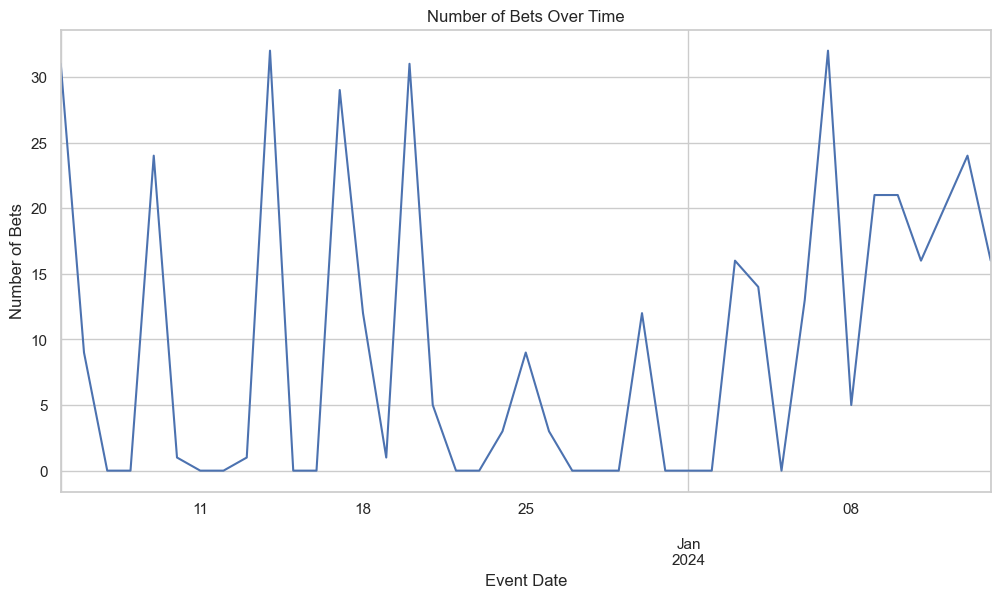

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Time Series Plot of Bets over Time
plt.figure(figsize=(12, 6))
df_cleaned.set_index('Event Datetime').resample('D').size().plot()
plt.title('Number of Bets Over Time')
plt.xlabel('Event Date')
plt.ylabel('Number of Bets')
plt.show()

---
Total Outcomes & Outcomes Considering Betting Time and Bet Odds

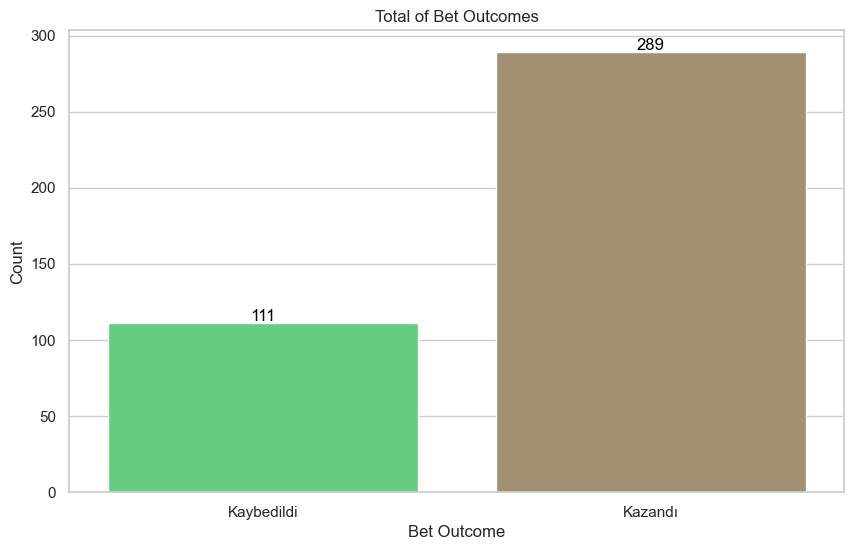

In [147]:
df_cleaned = df_cleaned[df_cleaned['Bet Outcome'] != 'Berabere']

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Bet Outcome', data=df_cleaned, palette="terrain")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Total of Bet Outcomes')
plt.xlabel('Bet Outcome')
plt.ylabel('Count')
plt.show()


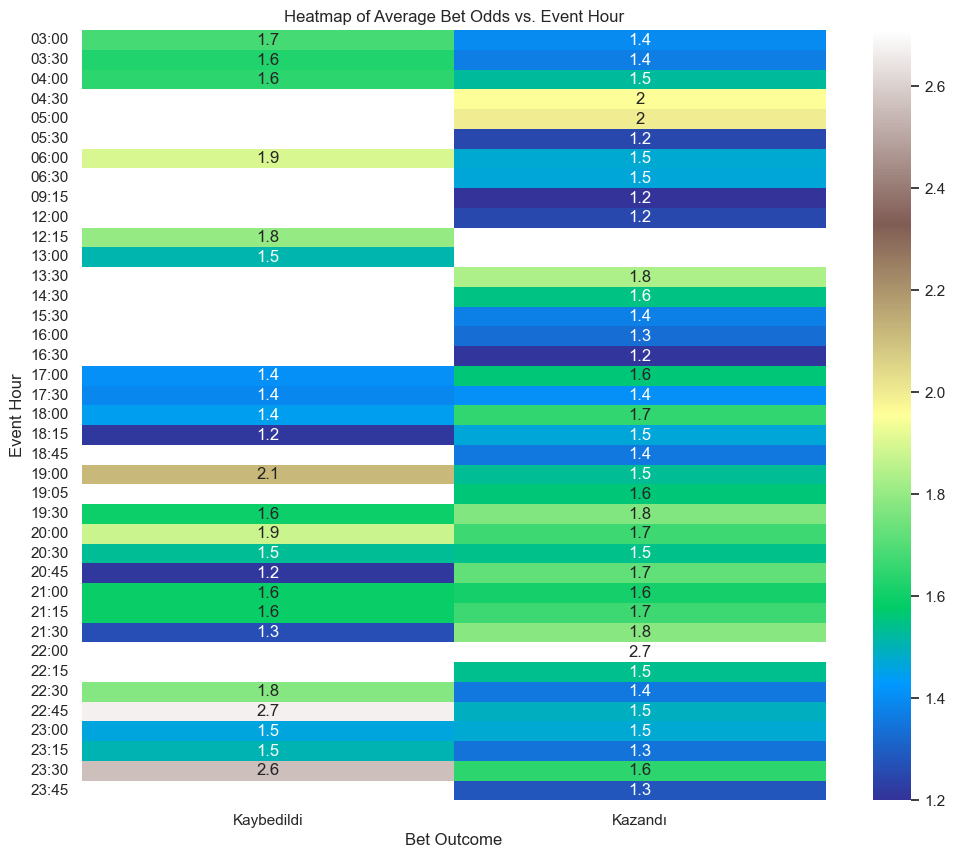

In [146]:
# Heatmap of Bet Odds vs. Event Hour
df_heatmap = df_cleaned.copy()
df_heatmap['Event Hour'] = df_heatmap['Event Datetime'].dt.strftime('%H:%M')
pivot_heatmap = df_heatmap.pivot_table(values='Bet Odds', index='Event Hour', columns='Bet Outcome', aggfunc='mean')

plt.figure(figsize=(12, 10))
sns.heatmap(pivot_heatmap, annot=True, cmap="terrain")
plt.title('Heatmap of Average Bet Odds vs. Event Hour')
plt.xlabel('Bet Outcome')
plt.ylabel('Event Hour')
plt.show()

---
Distribution of Odds

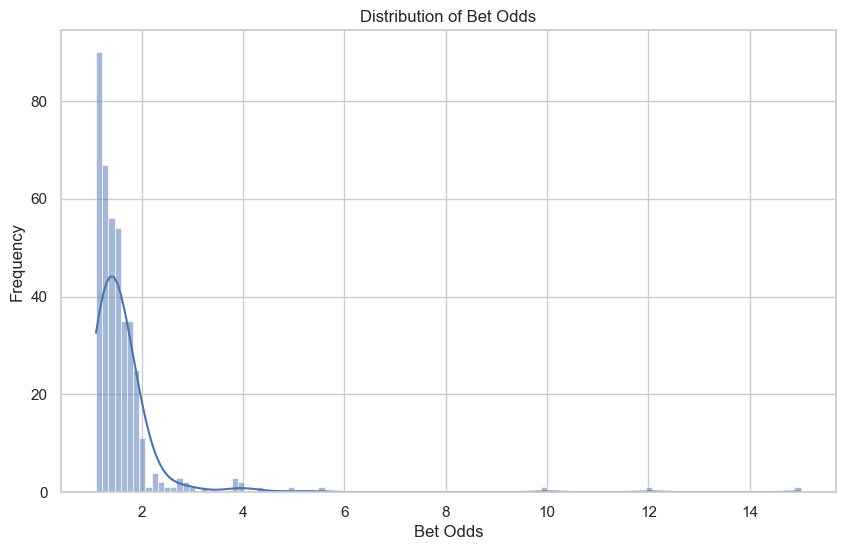

In [148]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Bet Odds'], kde=True)
plt.title('Distribution of Bet Odds')
plt.xlabel('Bet Odds')
plt.ylabel('Frequency')
plt.show()

---
Bet Selection Change Over Time

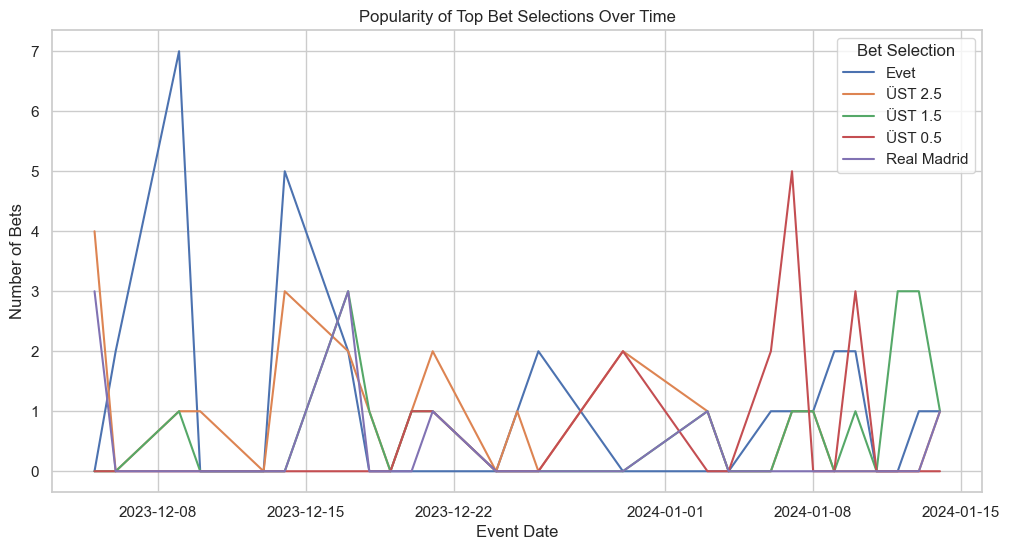

In [149]:
df_popularity = df_cleaned.copy()
df_popularity['Event Date'] = df_popularity['Event Datetime'].dt.date
df_popularity = df_popularity.groupby(['Event Date', 'Bet Selection']).size().reset_index(name='Count')
df_popularity = df_popularity.pivot(index='Event Date', columns='Bet Selection', values='Count').fillna(0)

top_selections = df_cleaned['Bet Selection'].value_counts().head(5).index
df_popularity_top = df_popularity[top_selections]

df_popularity_top.plot(kind='line', figsize=(12, 6))
plt.title('Popularity of Top Bet Selections Over Time')
plt.xlabel('Event Date')
plt.ylabel('Number of Bets')
plt.show()

---
Top 10 bets and their win/lose situations

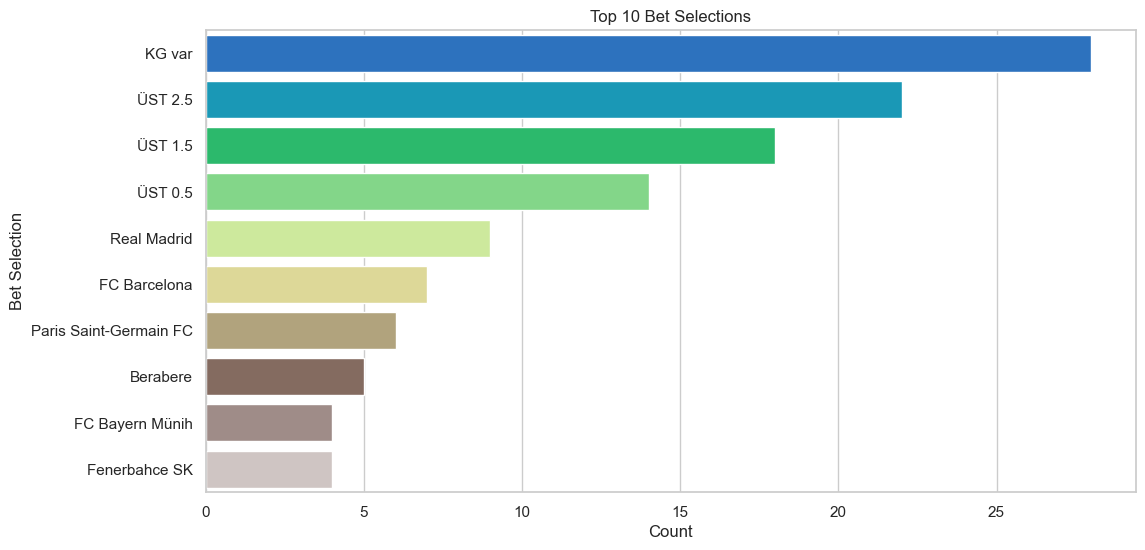

In [150]:
df_cleaned['Bet Selection'] = df_cleaned['Bet Selection'].replace('Evet', 'KG var')

plt.figure(figsize=(12, 6))
top_bet_selections = df_cleaned['Bet Selection'].value_counts().head(10)
sns.barplot(x=top_bet_selections.values, y=top_bet_selections.index, palette="terrain")
plt.title('Top 10 Bet Selections')
plt.xlabel('Count')
plt.ylabel('Bet Selection')
plt.show()

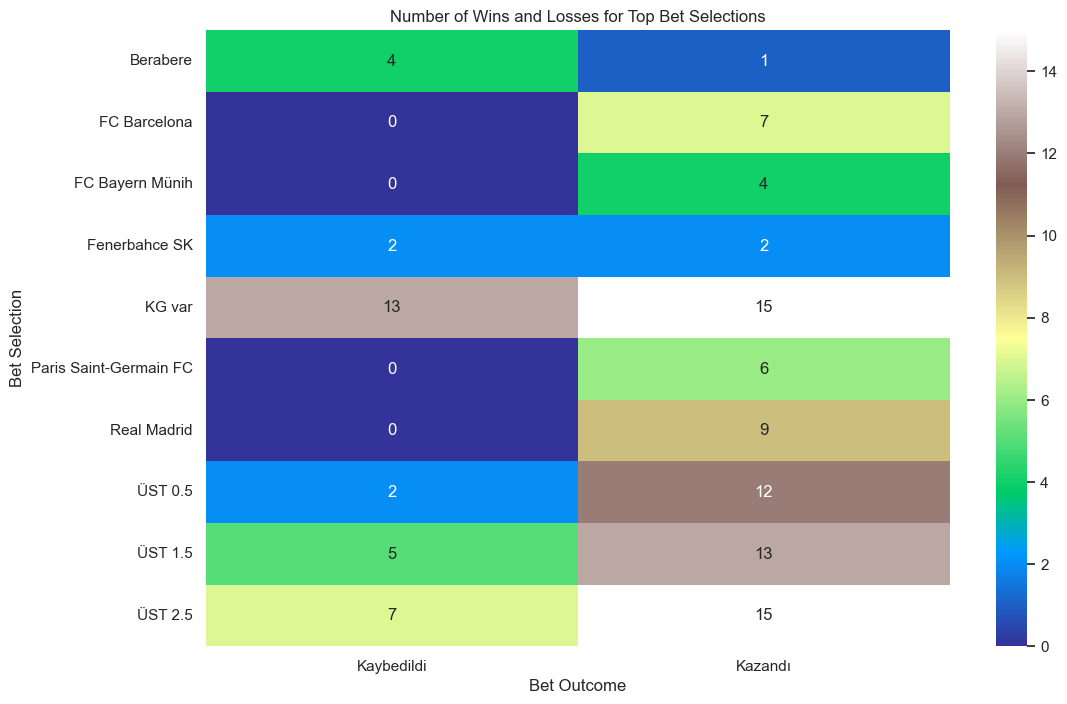

In [151]:
top_bet_selections = df_cleaned['Bet Selection'].value_counts().head(10).index

df_top_selections = df_cleaned[df_cleaned['Bet Selection'].isin(top_bet_selections)]

heatmap_data = pd.pivot_table(df_top_selections, values='Bet Odds', 
                              index='Bet Selection', 
                              columns='Bet Outcome', 
                              aggfunc='count', 
                              fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="terrain")
plt.title('Number of Wins and Losses for Top Bet Selections')
plt.xlabel('Bet Outcome')
plt.ylabel('Bet Selection')
plt.show()



---
Bet Odds Correlation with Winning

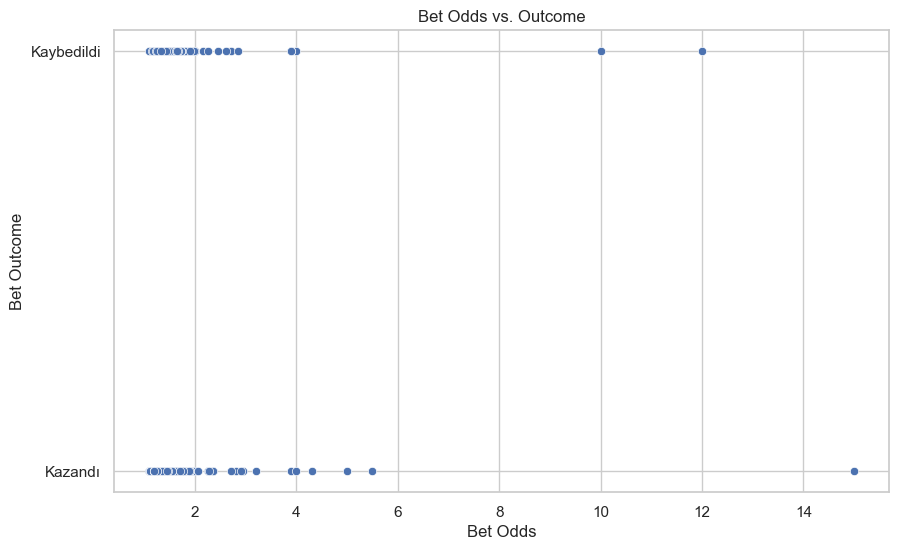

In [152]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Bet Odds', y='Bet Outcome', data=df_cleaned)
plt.title('Bet Odds vs. Outcome')
plt.xlabel('Bet Odds')
plt.ylabel('Bet Outcome')
plt.show()


---
Highest Winrated Bets

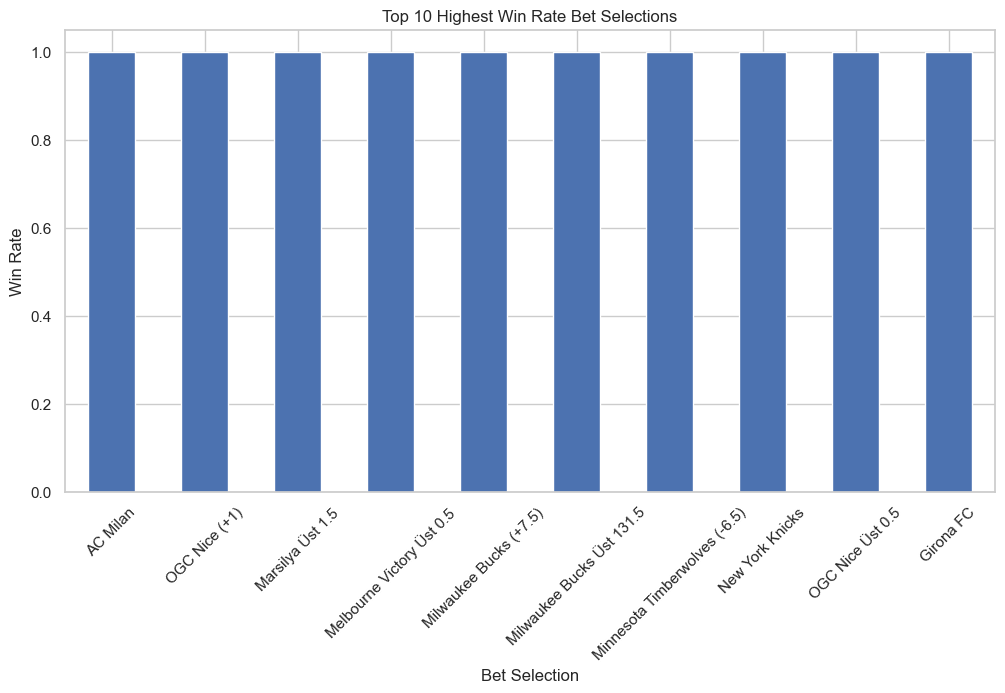

In [154]:
win_rate = df_cleaned[df_cleaned['Bet Outcome'] == 'Kazandı']['Bet Selection'].value_counts() / df_cleaned['Bet Selection'].value_counts()
win_rate = win_rate.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
win_rate.plot(kind='bar')
plt.title('Top 10 Highest Win Rate Bet Selections')
plt.xlabel('Bet Selection')
plt.xticks(rotation=45)
plt.ylabel('Win Rate')
plt.show()

---
Winning/Losing bets on top teams

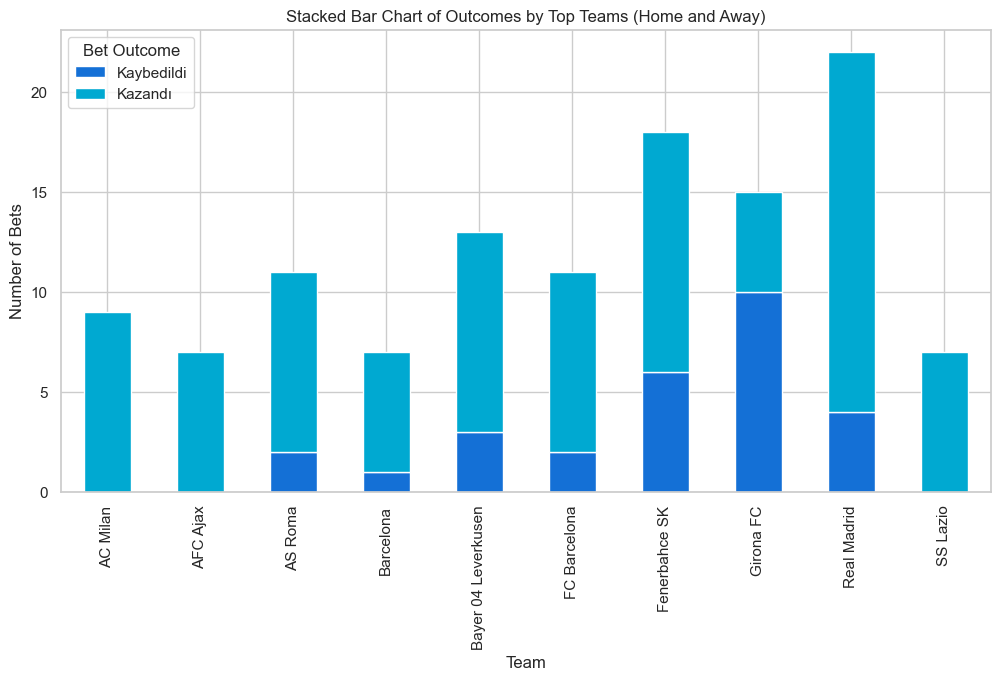

In [155]:
df_combined_teams = df_cleaned.copy()
df_combined_teams['Team'] = df_combined_teams.apply(lambda x: x['Home Team'] if x['Home Team'] in top_teams else x['Away Team'], axis=1)

df_combined_teams = df_combined_teams[df_combined_teams['Team'].isin(top_teams)]

outcomes_by_combined_team = pd.crosstab(df_combined_teams['Team'], df_combined_teams['Bet Outcome'])

terrain_palette = sns.color_palette("terrain", len(top_teams))

outcomes_by_combined_team.plot(kind='bar', stacked=True, figsize=(12, 6), color=terrain_palette)
plt.title('Stacked Bar Chart of Outcomes by Top Teams (Home and Away)')
plt.xlabel('Team')
plt.ylabel('Number of Bets')
plt.show()



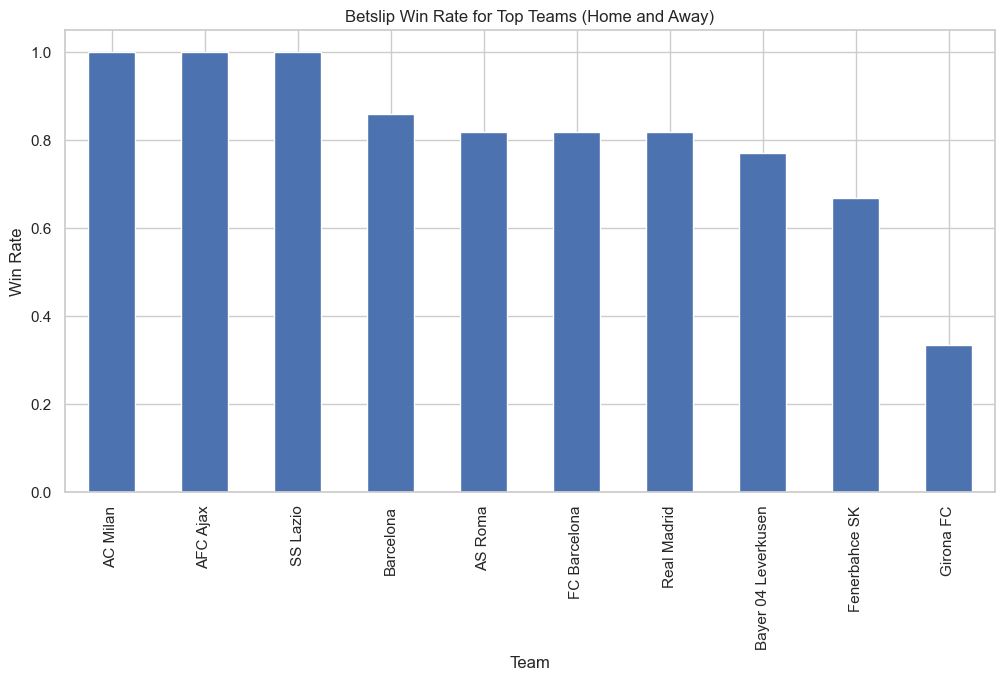

In [157]:
df_combined_team_performance = df_combined_teams.copy()

team_combined_win_rate = df_combined_team_performance[df_combined_team_performance['Bet Outcome'] == 'Kazandı'].groupby('Team').size() / df_combined_team_performance.groupby('Team').size()
team_combined_win_rate = team_combined_win_rate.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
team_combined_win_rate.plot(kind='bar')
plt.title('Betslip Win Rate for Top Teams (Home and Away)')
plt.xlabel('Team')
plt.ylabel('Win Rate')
plt.show()



Machine Learning Implementation
---

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

df.dropna(inplace=True) 

encoder = OneHotEncoder(sparse=False)
categorical_features = encoder.fit_transform(df[['Bet Selection', 'Home Team', 'Away Team']])
categorical_features_df = pd.DataFrame(categorical_features, columns=encoder.get_feature_names(['Bet Selection', 'Home Team', 'Away Team']))

df_encoded = pd.concat([df.reset_index(drop=True), categorical_features_df], axis=1)

X = df_encoded.drop(['Bet Outcome', 'Bet Selection', 'Home Team', 'Away Team', 'Event Datetime'], axis=1)
y = df_encoded['Bet Outcome'].apply(lambda x: 1 if x == 'Kazandı' else 0) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

In [161]:
# Model Evaluation
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.25      0.38        24
           1       0.75      0.96      0.85        57

    accuracy                           0.75        81
   macro avg       0.75      0.61      0.61        81
weighted avg       0.75      0.75      0.71        81



In [162]:
from sklearn.model_selection import GridSearchCV

# tuning
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30]}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Evaluate
best_predictions = best_model.predict(X_test)
print(classification_report(y_test, best_predictions))


              precision    recall  f1-score   support

           0       0.80      0.17      0.28        24
           1       0.74      0.98      0.84        57

    accuracy                           0.74        81
   macro avg       0.77      0.57      0.56        81
weighted avg       0.76      0.74      0.67        81



In [163]:
df_encoded

,Home Team,Away Team,Event Datetime,Bet Selection,Bet Odds,Bet Outcome,Bet Selection_AC Fiorentina,Bet Selection_AC Fiorentina (+1),Bet Selection_AC Fiorentina Üst 0.5,Bet Selection_AC Milan,...,Away Team_Valencia CF,Away Team_Valenciennes FC,Away Team_VfB Stuttgart,Away Team_VfL Bochum,Away Team_VfL Wolfsburg,Away Team_Villarreal CF,Away Team_Virtus Pallacanestro Bologna,Away Team_Washington Wizards,Away Team_Western Sydney Wanderers,Away Team_İnter
0,Buyukcekmece Basketbol,Anadolu Efes Istanbul,2024-01-14 20:30:00,Anadolu Efes Istanbul,1.70,Kaybedildi,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Manchester United,Tottenham Hotspur,2024-01-14 19:30:00,ÜST 4.5,1.22,Kaybedildi,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AC Fiorentina,Udinese,2024-01-14 20:00:00,ÜST 1.5,2.95,Kazandı,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Borussia Monchengladbach,VfB Stuttgart,2024-01-14 19:30:00,VfB Stuttgart (+1),1.20,Kaybedildi,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,SL Benfica,Rio Ave,2024-01-14 21:00:00,SL Benfica,1.78,Kazandı,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,Alanyaspor,Kocaelispor,2023-12-05 21:00:00,Alanyaspor Üst 1.5,1.33,Kaybedildi,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,Luton Town,Arsenal,2023-12-05 23:15:00,Arsenal Üst 1.5,1.25,Kazandı,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,Angers SCO,Grenoble Foot 38,2023-12-05 22:45:00,Angers SCO Üst 0.5,1.25,Kazandı,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
399,Pau FC,Valenciennes FC,2023-12-05 22:45:00,Pau FC (+1),1.45,Kazandı,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


BETSLIP PREDICTOR AS A SURPRISE
---

In [165]:
def predict_game_outcome(model, game, df_encoded_columns):
    """
    Predicts the outcome of a single game using the trained model.
    Ensures the number and order of features match the training data.

    game: A dictionary with details of the game.
    df_encoded_columns: List of column names from training data. drop not encoded columns
    """

    game_df = pd.DataFrame(columns=df_encoded_columns)
    game_df.loc[0] = 0  # init row with zeros

    for key, value in game.items():
        column_name = f"{key}_{value}"
        if column_name in df_encoded_columns:
            game_df.at[0, column_name] = 1

    # predict the outcome
    predicted_outcome = model.predict(game_df)[0]
    if predicted_outcome == 1:
        print("Betslip Wins")
    else:
        print("Betslip Loses")
    return predicted_outcome

# usage
upcoming_game = {
    "Home Team": "AC Milan",
    "Away Team": "Udinese",
    "Bet Selection": "AC Milan",
    "Bet Odds": 1.96
}

print("Predicting Upcoming game:")
print(upcoming_game)
print()
df_encoded_columns = df_encoded.drop(['Bet Outcome', 'Bet Selection', 'Home Team', 'Away Team', 'Event Datetime'], axis=1).columns.tolist()
predicted_outcome = predict_game_outcome(best_model, upcoming_game, df_encoded_columns)

print(f"Predicted Outcome: {predicted_outcome}")



Predicting Upcoming game:
{'Home Team': 'AC Milan', 'Away Team': 'Udinese', 'Bet Selection': 'AC Milan', 'Bet Odds': 1.96}

Betslip Wins
Predicted Outcome: 1
